In [1]:
%reload_ext autoreload

%autoreload 2
# after switching between these two commands, matplotlib has to be imported again
%matplotlib inline
# %matplotlib notebook


In [2]:
import numpy as np
from independent_vector_analysis import iva_g, consistent_iva
from independent_vector_analysis.visualization import calculate_cov, plot_scv_covs
from independent_vector_analysis.data_generation import MGGD_generation
import matplotlib.pyplot as plt

# Generate sources using MGGD

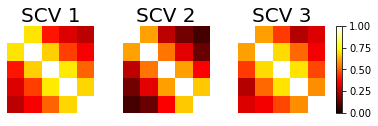

In [3]:
N = 3  # components
K = 5  # datasets
T = 100  # samples
rho = 0.7
S = np.zeros((N, T, K))
for idx in range(N):
    S[idx, :, :] = MGGD_generation(T, K, 'ar', rho, 1)[0].T

# plot true SCV covariance matrices
cov = calculate_cov(S)
plot_scv_covs(cov, n_cols=3)

# Generate observations

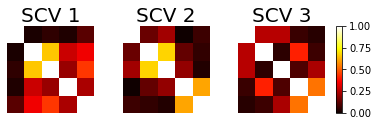

In [4]:
A = np.random.randn(N,N,K)
X = np.einsum('MNK, NTK -> MTK', A, S)

# plot covariance matrices of observed data
x_cov = calculate_cov(X)
plot_scv_covs(x_cov, n_cols=3)

# Apply IVA-G

In [5]:
# find most consistent of 50 runs
iva_results = consistent_iva(X, which_iva='iva_g', n_runs=50)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.88it/s]
c:\users\isi\documents\research\iva\independent_vector_analysis\independent_vector_analysis\consistent_iva.py:152: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  A_hat[:, :, k] = np.linalg.lstsq(S[:, :, k].T, X[:, :, k].T)[0].T


# Plot IVA-G results

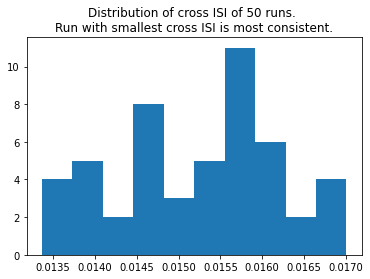

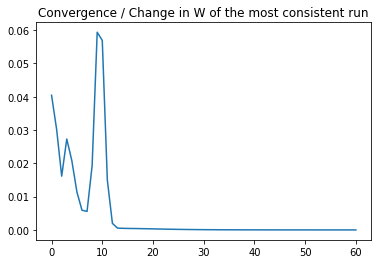

Estimated SCV covariance matrices of the most consistent run:


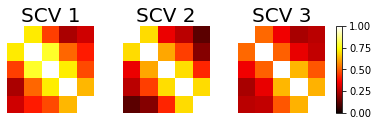

In [6]:
plt.figure()
plt.hist(iva_results['cross_isi'])
plt.title('Distribution of cross ISI of 50 runs. \n'
          'Run with smallest cross ISI is most consistent.')
plt.figure()
plt.plot(iva_results['W_change'])
plt.title('Convergence / Change in W of the most consistent run')
plt.show()

# plot covariance matrices of estimated sources
print('Estimated SCV covariance matrices of the most consistent run:')
plot_scv_covs(iva_results['scv_cov'], n_cols=3)